In [2]:
# import packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [154]:
# import data 
data = pd.read_csv('Data/ImprovedAirbnbCleaned.csv')
data.dtypes

id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
Bronx                               int64
Brooklyn                            int64
Manhattan                           int64
Queens                              int64
Staten Island                       int64
days_since_last_review            float64
Entire home/apt                     int64
Private room                      

In [155]:
# drop columns that are not needed
data = data.drop(['id', 'host_id','room_type','neighbourhood_group'], axis=1).select_dtypes(exclude=['object'])

In [156]:
# drop rows with missing values
data = data.dropna()

In [157]:
data.dtypes

latitude                          float64
longitude                         float64
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
Bronx                               int64
Brooklyn                            int64
Manhattan                           int64
Queens                              int64
Staten Island                       int64
days_since_last_review            float64
Entire home/apt                     int64
Private room                        int64
Shared room                         int64
textfeat1                         float64
textfeat2                         float64
textfeat3                         float64
textfeat4                         float64
textfeat5                         float64
textfeat6                         float64
dtype: object

In [158]:
# split training and testing data
from sklearn.model_selection import train_test_split
X = data.drop('price', axis=1)
y = data['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [159]:
X_train.shape, X_test.shape

((31074, 22), (7769, 22))

In [160]:
# linreg on all features
from sklearn.preprocessing import RobustScaler
from sklearn.linear_model import LinearRegression
r_scaler = RobustScaler()
X_train = r_scaler.fit_transform(X_train)
X_test = r_scaler.transform(X_test)

linreg = LinearRegression()
linreg.fit(X_train, y_train)

LinearRegression()

In [161]:
# get predictions linreg
y_pred_linreg = linreg.predict(X_test)
results_linreg = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_linreg}) 
results_linreg.head(10) 

,Actual,Predicted
29475,60,72.260469
12661,95,85.850834
5865,195,160.452529
8623,91,172.747997
14847,70,59.018276
23148,229,156.520913
7450,190,192.717855
41737,135,165.694204
34391,175,162.113606
39297,240,193.889488


In [162]:
pd.DataFrame(linreg.coef_, X.columns, columns=['Coefficient'])

,Coefficient
latitude,-13.731208
longitude,-20.227258
minimum_nights,-0.614468
number_of_reviews,-6.051985
reviews_per_month,3.471245
calculated_host_listings_count,-0.116663
availability_365,41.143153
Bronx,27.440098
Brooklyn,1.120104
Manhattan,62.555883


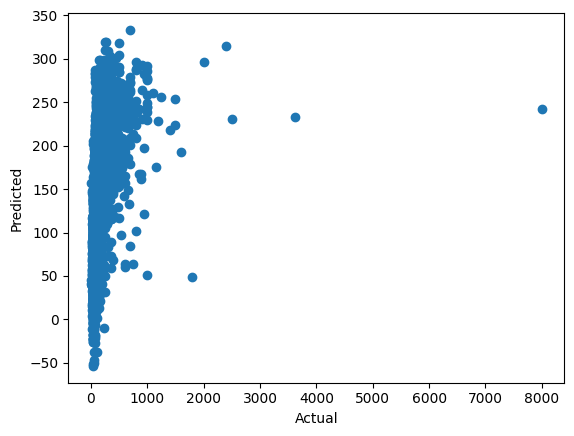

In [163]:
# plot actual vs predicted
plt.scatter(y_test, y_pred_linreg)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

In [200]:
# train and test rmse linreg
from sklearn.metrics import mean_squared_error
train_rmse_linreg = np.sqrt(mean_squared_error(y_train, linreg.predict(X_train)))
test_rmse_linreg = np.sqrt(mean_squared_error(y_test, y_pred_linreg))
train_rmse_linreg, test_rmse_linreg

(193.40625868464747, 142.8113297244579)

In [193]:
# find the max depth for the decision tree
from sklearn.tree import DecisionTreeRegressor as DTR
from sklearn.model_selection import GridSearchCV
import sklearn.model_selection as skm

tree = DTR(random_state=1)

kfold = skm.KFold(5,
                  shuffle=True,
                  random_state=1) 

max_depth_range = range(1, 20)
param_grid = dict(max_depth=max_depth_range)
grid = GridSearchCV(tree, param_grid, refit=True, cv=kfold, scoring='neg_mean_squared_error')

grid.fit(X_train, y_train)  

grid.best_params_

{'max_depth': 3}

In [182]:
# decision tree with max_depth
tree_optimal = DTR(max_depth = 3, random_state=1)
tree_optimal.fit(X_train, y_train)

y_pred_tree = tree_optimal.predict(X_test)
results_tree = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_tree})
results_tree.head(10)

,Actual,Predicted
29475,60,72.196142
12661,95,72.196142
5865,195,226.306578
8623,91,171.045396
14847,70,72.196142
23148,229,226.306578
7450,190,171.045396
41737,135,171.045396
34391,175,171.045396
39297,240,226.306578


In [183]:
# mse and rmse for tree
train_rmse_tree = np.sqrt(mean_squared_error(y_train, tree_optimal.predict(X_train)))
test_rmse_tree = np.sqrt(mean_squared_error(y_test, y_pred_tree))
train_rmse_tree, test_rmse_tree

(182.94565656368476, 142.72210021177878)

In [184]:
# important features for tree
feature_names = X.columns
feature_imp = pd.DataFrame({'importance':tree_optimal.feature_importances_}, index=feature_names)
feature_imp.sort_values(by='importance', ascending=False).head(10)

,importance
days_since_last_review,0.423585
Entire home/apt,0.365281
longitude,0.092799
minimum_nights,0.059588
availability_365,0.051211
textfeat5,0.007536
latitude,0.000000
textfeat4,0.000000
textfeat3,0.000000
textfeat2,0.000000


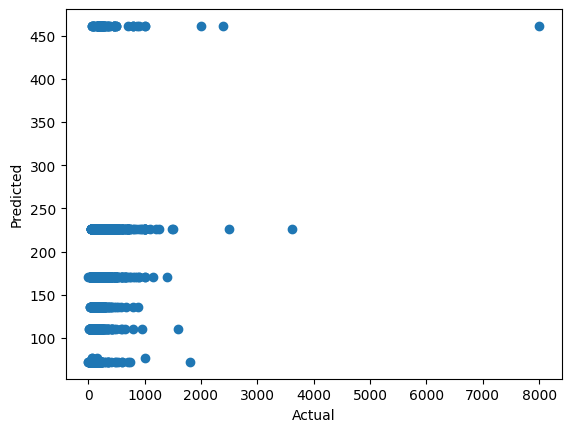

In [192]:
# plot actual vs predicted
plt.scatter(y_test, y_pred_tree)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

In [185]:
# find the optimal number of features
from sklearn.ensemble import RandomForestRegressor as RFR
test_errs = list()
num_estimators = range(1, X_train.shape[1])
for m in num_estimators:
    rf = RFR(max_features=m, random_state=0).fit(X_train, y_train)
    y_hat_RF = rf.predict(X_test) 
    err = np.mean((y_test - y_hat_RF)**2)
    print(m, err)
    test_errs.append(err)

1 16388.46671013966
2 16189.363702596862
3 15941.296257140557
4 15778.786903053806
5 15747.51268751448
6 16143.43597859441
7 16033.049306773719
8 16044.316712279573
9 16044.771760406742
10 16392.96366971296
11 16462.67521342515
12 16514.183760702796
13 16525.776899588105
14 16569.517240919038
15 16950.360961784012
16 17104.604216334148
17 16655.1685283048
18 16820.347875518084
19 17233.01193306732
20 16804.828303629813
21 16673.825096653367


Text(0, 0.5, 'Test Error')

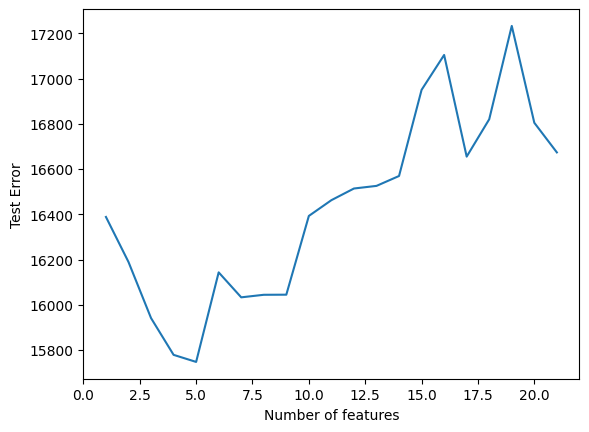

In [186]:
# plot 
plt.plot(num_estimators, test_errs)
plt.xlabel('Number of features')
plt.ylabel('Test Error')

In [187]:
# random forest with max features set from above
rf = RFR(max_features=5, random_state=1)
rf.fit(X_train, y_train)

RandomForestRegressor(max_features=5, random_state=1)

In [188]:
# get predictions
y_pred_rf = rf.predict(X_test)
results_rf = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_rf})
results_rf.head(10)

,Actual,Predicted
29475,60,121.50
12661,95,99.43
5865,195,209.79
8623,91,185.38
14847,70,85.69
23148,229,161.32
7450,190,169.73
41737,135,153.25
34391,175,172.00
39297,240,180.85


In [189]:
# get train and test rmse rf
train_rf_rmse = np.sqrt(mean_squared_error(y_train, rf.predict(X_train)))
rf_rmse = np.sqrt(mean_squared_error(y_test, y_pred_rf))
train_rf_rmse, rf_rmse

(71.25797188077806, 124.74151938715755)

In [190]:
# important features in random forest
feature_names = X.columns
feature_imp = pd.DataFrame({'importance':rf.feature_importances_}, index=feature_names)
feature_imp.sort_values(by='importance', ascending=False).head(10)

,importance
longitude,0.114704
days_since_last_review,0.100451
minimum_nights,0.097677
latitude,0.084581
availability_365,0.067762
textfeat6,0.062968
textfeat1,0.058385
textfeat3,0.057269
textfeat2,0.051292
reviews_per_month,0.050469


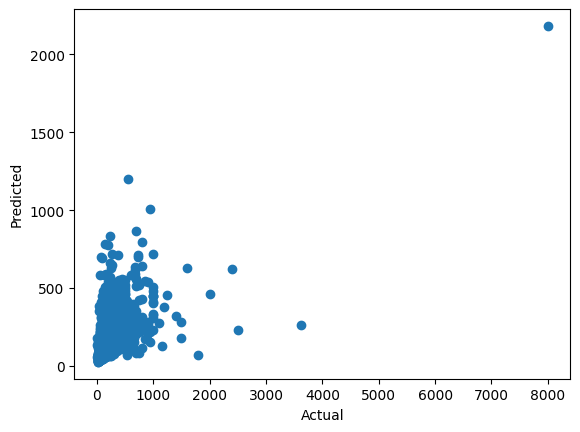

In [191]:
# plot actual vs predicted
plt.scatter(y_test, y_pred_rf)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

In [195]:
# append predicted values from random forest to the data frame
data['predicted_price'] = rf.predict(data.drop('price', axis=1))

C:\Users\jerry\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(


In [196]:
# summary stats between the actual and predicted price
data[['price', 'predicted_price']].describe()

,price,predicted_price
count,38843.000000,38843.000000
mean,142.317947,674.586865
std,196.945624,329.694616
min,0.000000,152.830000
25%,69.000000,351.055000
50%,101.000000,690.800000
75%,170.000000,942.935000
max,10000.000000,1736.980000


In [198]:
# summary stats of residuals
data['residual'] = data['price'] - data['predicted_price']
data['residual'].describe()

count    38843.000000
mean      -532.268918
std        348.552886
min      -1625.600000
25%       -788.770000
50%       -584.210000
75%       -221.730000
max       9770.040000
Name: residual, dtype: float64